## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [127]:


df = pd.read_csv('/content/sneeze5.csv')
df = df.iloc[:, 1:]

df


,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805
...,...,...,...,...,...,...
845,30,0,1,1,33.0,72.282306
846,4,1,1,0,29.0,31.734540
847,50,0,1,0,29.0,134.725193
848,29,0,0,0,41.0,75.382218


In [128]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [129]:
# 1. Estatísticas Descritivas
print("### 1. Estatísticas Descritivas das Variáveis Numéricas ###")
print(df[['nsneeze', 'age', 'pollen']].describe())
# 2. Contagem de Variáveis Binárias (0/1)
print("\n### 2. Contagem das Variáveis Binárias (0/1) ###")
for col in ['alcohol', 'antihist', 'smoker']:
    print(f"\nDistribuição de '{col}':")
    print(df[col].value_counts(normalize=True)) # Valores em porcentagem

### 1. Estatísticas Descritivas das Variáveis Numéricas ###
           nsneeze         age      pollen
count   850.000000  850.000000  850.000000
mean     45.225882   31.258824   59.425317
std     145.954955   11.661553   31.022778
min       0.000000   18.000000    6.876659
25%       9.000000   19.000000   36.913786
50%      18.000000   30.000000   54.628146
75%      37.000000   39.000000   76.149298
max    3179.000000   80.000000  210.301477

### 2. Contagem das Variáveis Binárias (0/1) ###

Distribuição de 'alcohol':
alcohol
0    0.591765
1    0.408235
Name: proportion, dtype: float64

Distribuição de 'antihist':
antihist
0    0.729412
1    0.270588
Name: proportion, dtype: float64

Distribuição de 'smoker':
smoker
0    0.811765
1    0.188235
Name: proportion, dtype: float64


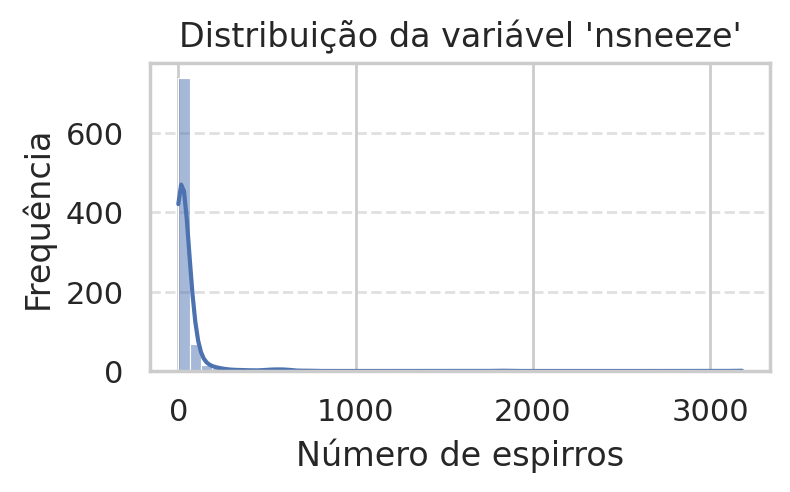

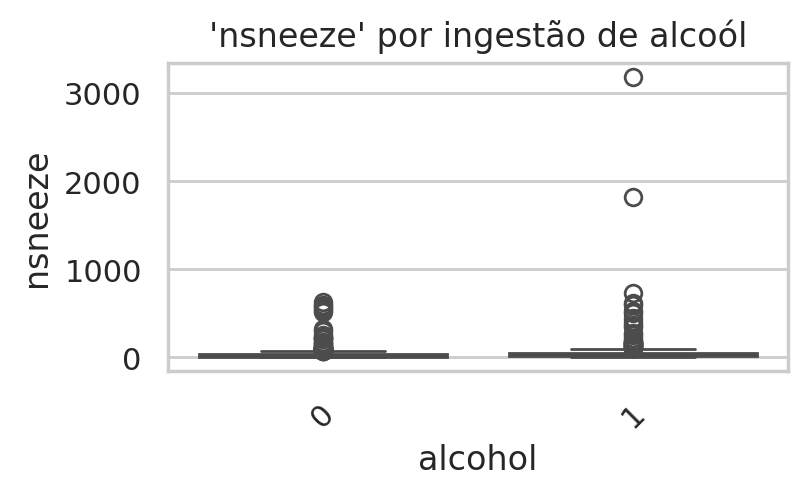

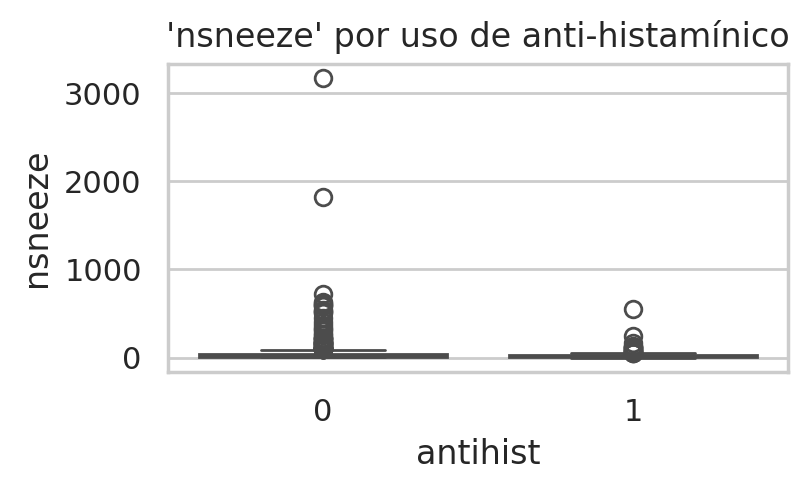

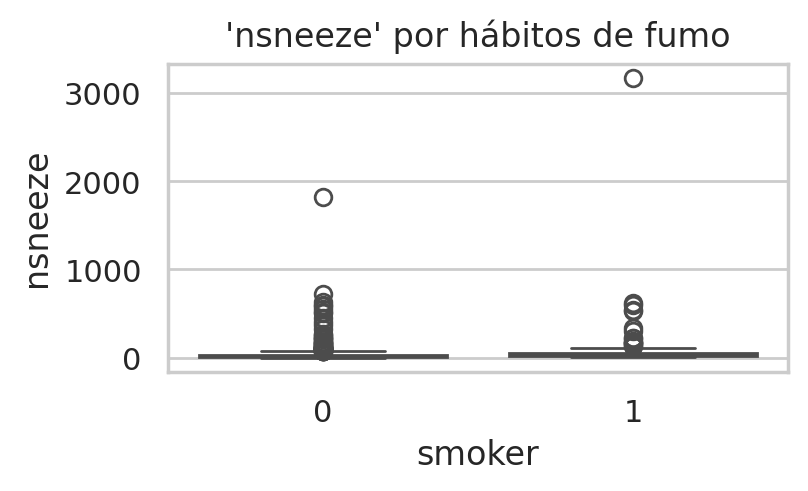

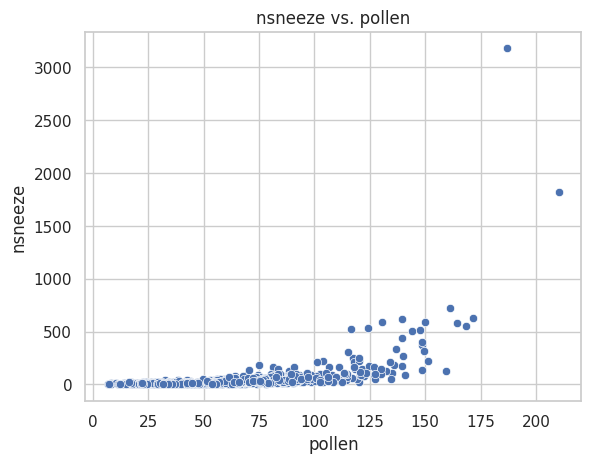

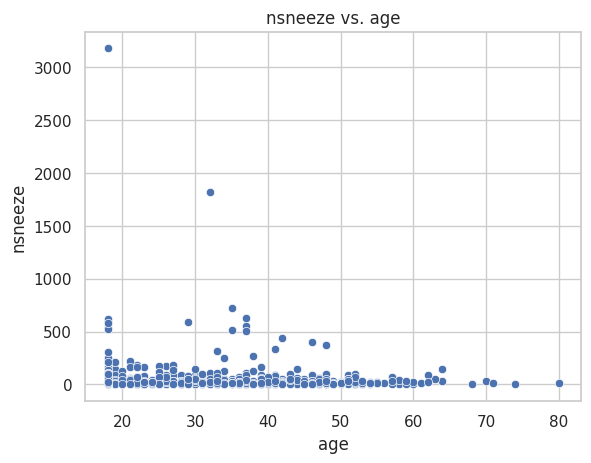

In [130]:


# Distribuição de 'nsneeze'

plt.figure(figsize=(4,2), dpi=200)
sns.histplot(df['nsneeze'], bins=50, kde=True)
plt.title("Distribuição da variável 'nsneeze'")
plt.xlabel("Número de espirros")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Boxplot de 'nsneeze' por 'alcohol'
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(x='alcohol', y='nsneeze', data=df)
plt.title("'nsneeze' por ingestão de alcoól")
plt.xticks(rotation=45)
plt.show()

#  Boxplot de 'nsneeze' por 'antihist'
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(x='antihist', y='nsneeze', data=df)
plt.title("'nsneeze' por uso de anti-histamínico")
plt.show()

#  Boxplot de 'nsneeze' por 'smoker'
plt.figure(figsize=(4,2), dpi=200)
sns.boxplot(x='smoker', y='nsneeze', data=df)
plt.title("'nsneeze' por hábitos de fumo")
plt.show()

# Gráfico de dispersão entre 'nsneeze' e 'pollen'
sns.scatterplot(x='pollen', y='nsneeze', data=df)
plt.title('nsneeze vs. pollen')
plt.show()

# Gráfico de dispersão entre 'nsneeze' e 'age'
sns.scatterplot(x='age', y='nsneeze', data=df)
plt.title('nsneeze vs. age')
plt.show()

In [131]:
# Variáveis dummy para as variáveis categóricas
vars_categoricas = ['alcohol', 'antihist', 'smoker']
preditoras = pd.get_dummies(df[vars_categoricas + ['nsneeze']], drop_first=True).astype(float)
preditoras

,alcohol,antihist,smoker,nsneeze
0,0.0,1.0,0.0,7.0
1,1.0,0.0,1.0,17.0
2,0.0,0.0,0.0,56.0
3,0.0,0.0,1.0,35.0
4,0.0,0.0,0.0,23.0
...,...,...,...,...
845,0.0,1.0,1.0,30.0
846,1.0,1.0,0.0,4.0
847,0.0,1.0,0.0,50.0
848,0.0,0.0,0.0,29.0


In [132]:
# Correlação de nsneeze com todas as outras variáveis
correlation = df.corr()['nsneeze'].sort_values(ascending=False)
print("\n### Coeficientes de Correlação de Pearson com 'nsneeze' ###")
print(correlation)


### Coeficientes de Correlação de Pearson com 'nsneeze' ###
nsneeze     1.000000
pollen      0.516441
smoker      0.106048
alcohol     0.089309
age        -0.058721
antihist   -0.088120
Name: nsneeze, dtype: float64


**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [133]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [134]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5243.5
Date:                Mon, 01 Dec 2025   Deviance:                       6416.9
Time:                        22:17:21   Pearson chi2:                 6.61e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5704      0.021  

In [135]:
print(f"Fator de mudança para cada variável:")
print(f"Alcohol: {np.exp(0.3477)}")
print(f"Antihist: {np.exp(-0.5969)}")
print(f"Smoker: {np.exp(0.6700)}")
print(f"Age: {np.exp(-0.0127)}")
print(f"Pollen: {np.exp(0.0301)}")

Fator de mudança para cada variável:
Alcohol: 1.41580744378918
Antihist: 0.5505155919328837
Smoker: 1.9542373206359396
Age: 0.9873803046840219
Pollen: 1.0305575845593566


### * Estimativa dos coeficientes
- Intercepto: 1,5704
  
  Valor esperado de espirros quando todas as variáveis são zero

- Alcohol: 0,3477

  $e^{0.3477} \approx \mathbf{1.416}$  -> Isso representa que o consumo de alcoól tem uma relação de aumento na quantidade de espirros de aproximadamente 41,6%;

- Antihist: -0,5969

  $e^{-0.5969} \approx \mathbf{0.550}$ -> Um coeficiente negativo indica que o uso de anti-histamínicos reduz o número esperado de espirros em aproximadamente 45,0% (1-0,550);

- Smoker: 0,6700

  $e^{0.6700} \approx \mathbf{1.954}$ -> O coeficiente em relação aos hábitos d fumo tem um fator de mudança elevado (95,4% no aumento do númro esperado de espirros), o que mostra que fumar aumenta drasticamente a quantidade esperada de espirros;

- Age: -0,0127

  $e^{-0.0127} \approx \mathbf{0.987}$ -> O coeficiente em relação à idade é negativo, o que indica que com o aumento da idade, os espirros tendem a diminuir 1,3% (1-0,987);

- Pollen: 0,0301

  $e^{0.0301} \approx \mathbf{1.031}$ -> O aumento da quantidade de polén presente no ar gera um aumento na quantidade de espirros esperados de 3,1%.

### * Significância estatística
  O P-valor referente a todos os parâmetros é 0,000 ($\leq \mathbf{0.05}$), o que significa que todas as variáveis são estatisticamente significantes. Dessa forma, rejeitamos a hipótese nula de $\beta$=0.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [136]:
deviance = results.deviance
df_resid = results.df_resid
dispersion = deviance / df_resid
print(f"Média de espirros: {df['nsneeze'].mean()}, \nVariância de espirros: {df['nsneeze'].var()}")
print(f"MÉTODO 1 - Razão entre Deviance e Graus de Liberdade Residual: {dispersion}")

Média de espirros: 45.22588235294118, 
Variância de espirros: 21302.84879927941
MÉTODO 1 - Razão entre Deviance e Graus de Liberdade Residual: 7.602915944625351


In [137]:
pearson_chi2 = ajuste_pois.pearson_chi2
razao_chi2_df = pearson_chi2 / df_resid
print(f"MÉTODO 2 - Razão entre Qui-quadrado de Pearson e Graus de Liberdade Residual: {razao_chi2_df}")

MÉTODO 2 - Razão entre Qui-quadrado de Pearson e Graus de Liberdade Residual: 7.837571444486235


In [138]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

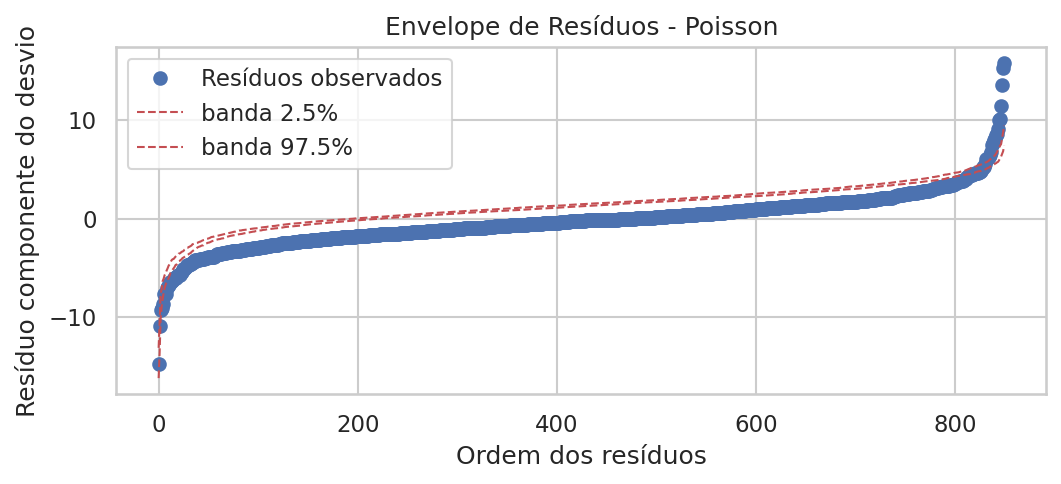

In [139]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**Conclusão:** Podemos perceber que os dois métodos de avaliação indicam uma superdispersão, uma vez que os resultados mostraram uma dispersão de aproximadamente 7,60 e 7,84, respectivamente. O ideal seria se manter em torno de 1, o que indica que a variância condicional é de 7 a 8 vezes maior que a esperança condicional, o que em um modelo Poisson é inviável. Portanto, o modelo Poisson não é adequado em termos de dispersão.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [140]:


formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3142.6
Date:                Mon, 01 Dec 2025   Deviance:                       777.09
Time:                        22:17:23   Pearson chi2:                     752.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9985
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4942      0.064  

### Comparação pelo desvio:

In [141]:
desvio_poi= ajuste_pois.deviance
desvio_bn= ajuste_nb.deviance
print(f"Desvio do modelo Poisson: {desvio_poi}")
print(f"Desvio do modelo Binomial Negativo: {desvio_bn}")

Desvio do modelo Poisson: 6416.861057263796
Desvio do modelo Binomial Negativo: 777.0949027737793


### Comparação pelo AIC:

In [142]:
AIC_poi= ajuste_pois.aic
AIC_bn= ajuste_nb.aic
print(f"AIC do modelo Poisson: {AIC_poi}")
print(f"AIC do modelo Binomial Negativo: {AIC_bn}")

AIC do modelo Poisson: 10499.065631732288
AIC do modelo Binomial Negativo: 6297.189432074626


### Comparação gráficos de resíduos componentes do desvio

*Gráfico do modelo Poisson já foi gerado anteriormente

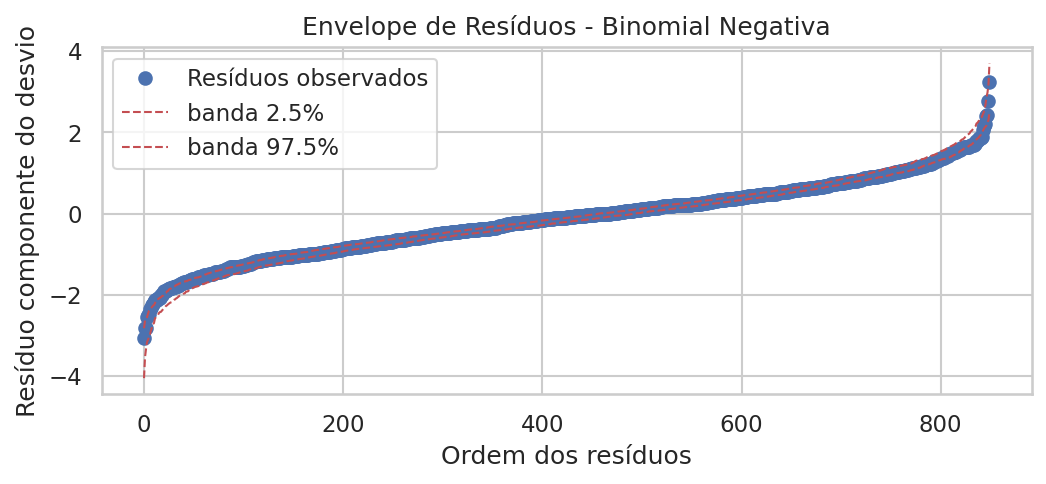

In [143]:


def envelope_negbin(fitted_model, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")
plt.show()

**Conclusão:** Podemos perceber que o desvio e o AIC do modelo Binomial Negativo são menores que os do modelo Poisson, além disso, o gráfico de resíduos componentes do desvio se adequa muito melhor aos envelopes no modelo Binomial negativo do que no modelo Poisson. Dessa forma, podemos concluir que o modelo Binomial Negativo se adequa melhor para descrever o número de espirros.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [144]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


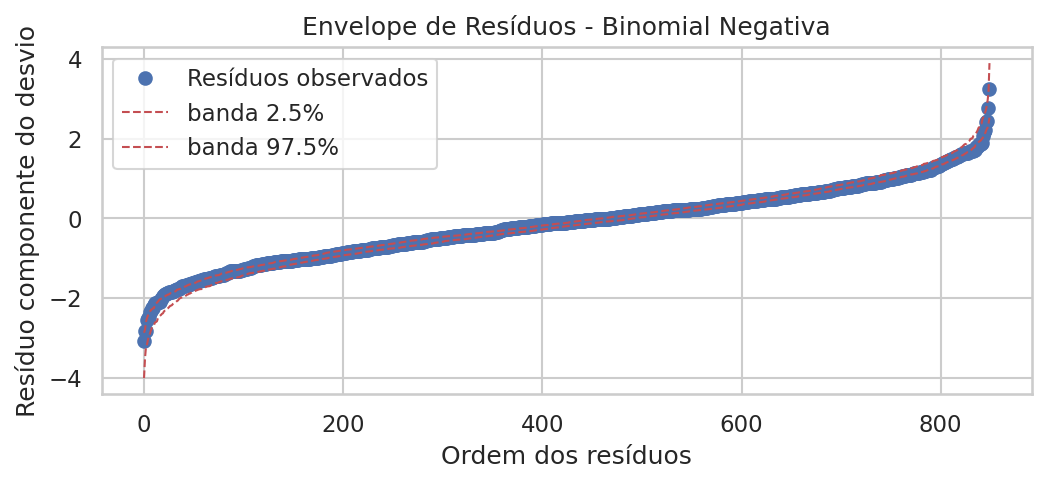

In [145]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [146]:
from statsmodels.discrete.discrete_model import NegativeBinomial

margeff = results_nb.get_margeff(at="overall", method="dydx")
ame_df = margeff.summary_frame()
ame_subset = ame_df[ame_df.index.str.contains("alcohol|antihist", case=False)]
print(ame_subset)

                      dy/dx  Std. Err.          z      Pr(>|z|)  \
C(alcohol)[T.1]   17.087435   1.764490   9.684063  3.524260e-22   
C(antihist)[T.1] -26.706064   2.132301 -12.524526  5.481761e-36   

                  Conf. Int. Low  Cont. Int. Hi.  
C(alcohol)[T.1]        13.629097       20.545772  
C(antihist)[T.1]      -30.885298      -22.526830  


**Conclusão:** O cálculo do efeito médio marginal nos permite concluir que pessoas que consomem alcoól espirram, em média, 17,08 vezes a mais que pessoas que não consomem; enquanto isso, pessoas que usam anti-histamínico espirram, em média, 26,7 vezes a menos que pessoas que não fazem o uso.

Podemos interpretar dessa forma pois são variáveis binárias.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



### Ajustes nos conjuntos de treinamento

In [147]:


df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42 # Para garantir que a separação seja a mesma toda vez
)

In [148]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
print("\n### Ajuste do Modelo de Poisson (Treinamento) ###")
modelo_pois_train = smf.glm(formula=formula, data=df_train, family=sm.families.Poisson()).fit()
print(modelo_pois_train.summary().tables[1])


### Ajuste do Modelo de Poisson (Treinamento) ###
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4855      0.024     62.618      0.000       1.439       1.532
C(alcohol)[T.1]      0.3593      0.012     30.666      0.000       0.336       0.382
C(antihist)[T.1]    -0.5402      0.017    -32.507      0.000      -0.573      -0.508
C(smoker)[T.1]       0.6183      0.013     48.262      0.000       0.593       0.643
age                 -0.0130      0.001    -23.959      0.000      -0.014      -0.012
pollen               0.0314      0.000    245.162      0.000       0.031       0.032


In [149]:
print("\n### Ajuste do Modelo Binomial Negativo (Treinamento) ###")
modelo_nb_train = smf.glm(formula=formula, data=df_train, family=sm.families.NegativeBinomial()).fit()
print(modelo_nb_train.summary().tables[1])


### Ajuste do Modelo Binomial Negativo (Treinamento) ###
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4992      0.143     10.494      0.000       1.219       1.779
C(alcohol)[T.1]      0.3616      0.081      4.460      0.000       0.203       0.520
C(antihist)[T.1]    -0.5724      0.091     -6.280      0.000      -0.751      -0.394
C(smoker)[T.1]       0.5409      0.099      5.457      0.000       0.347       0.735
age                 -0.0103      0.003     -3.013      0.003      -0.017      -0.004
pollen               0.0304      0.001     23.653      0.000       0.028       0.033


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### Calculos com o conjunto de teste

In [150]:


# Geração das Predições no Conjunto de Teste

# Predições para o Modelo de Poisson
y_pred_pois = modelo_pois_train.predict(df_test)
# Predições para o Modelo Binomial Negativo
y_pred_nb = modelo_nb_train.predict(df_test)
# Valores Observados no Teste
y_test = df_test['nsneeze']

In [151]:
# --- Modelo de Poisson ---
eqm_pois = mean_squared_error(y_test, y_pred_pois)
eam_pois = mean_absolute_error(y_test, y_pred_pois)

# --- Modelo Binomial Negativo ---
eqm_nb = mean_squared_error(y_test, y_pred_nb)
eam_nb = mean_absolute_error(y_test, y_pred_nb)

In [152]:
print("### Comparação de Performance no Conjunto de Teste ###")
print("Modelo de Poisson:")
print(f"  > Erro Quadrático Médio (EQM):    {eqm_pois:.4f}")
print(f"  > Erro Absoluto Médio (EAM):      {eam_pois:.4f}")
print("-" * 50)
print("Modelo Binomial Negativo:")
print(f"  > Erro Quadrático Médio (EQM):    {eqm_nb:.4f}")
print(f"  > Erro Absoluto Médio (EAM):      {eam_nb:.4f}")
print("-" * 50)

### Comparação de Performance no Conjunto de Teste ###
Modelo de Poisson:
  > Erro Quadrático Médio (EQM):    9617.6264
  > Erro Absoluto Médio (EAM):      19.4886
--------------------------------------------------
Modelo Binomial Negativo:
  > Erro Quadrático Médio (EQM):    5871.8866
  > Erro Absoluto Médio (EAM):      16.7088
--------------------------------------------------


**Conclusão:** Podemos perceber que o EQM e o EAM do modelo Binomial Negativo são menores que os do modelo Poisson. Dessa forma concluímos que o modelo Binomial Negativo tem melhor desempenho preditivo, coincidindo com as conclusões baseadas em critérios de ajuste.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

* Indivíduo 1

In [153]:
q1_pollen = df['pollen'].quantile(0.25)
print(q1_pollen)

36.91378578024077


In [154]:
individuo1= pd.DataFrame({
    'alcohol': [0],
    'antihist': [1],
    'smoker': [0],
    'age': [30],
    'pollen': [q1_pollen] # Usamos o valor Q3 calculado
})


previsao_1 = modelo_nb_train.predict(individuo1)

print(f"Número esperado de espirros: {previsao_1.iloc[0]:.2f} espirros")

Número esperado de espirros: 5.70 espirros


* Indivíduo 2

In [155]:
q3_pollen = df['pollen'].quantile(0.75)
print(q3_pollen)

76.14929792533988


In [156]:
individuo2= pd.DataFrame({
    'alcohol': [1],
    'antihist': [0],
    'smoker': [1],
    'age': [50],
    'pollen': [q3_pollen] # Usamos o valor Q3 calculado
})

previsao_2 = modelo_nb_train.predict(individuo2)

print(f"Número esperado de espirros: {previsao_2.iloc[0]:.2f} espirros")

Número esperado de espirros: 66.83 espirros
